In [28]:
import numpy as np 
import pandas as pd

In [29]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [30]:
df.shape

(400, 8)

In [95]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [106]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((256, 7), (64, 7), (80, 7), (256, 1), (64, 1), (80, 1))

## Q1 Trainng

In [97]:
from keras.models import Sequential
from keras.layers import Dense

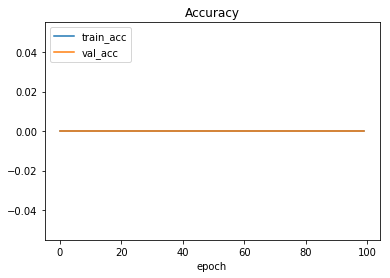

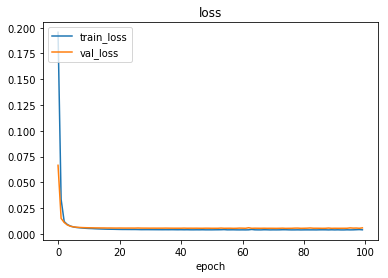

In [121]:
model = Sequential([
    Dense(10, activation='sigmoid', input_dim=7),
    Dense(10, activation='sigmoid'),
    Dense(1),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_val, y_val), verbose=0)

plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc',], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss',], loc='upper left')

plt.show()

## Q2.Correlation Matrix

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


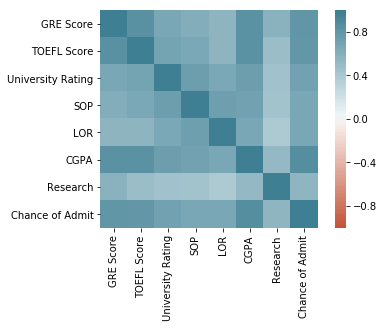

In [41]:
import seaborn as sns

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )

In [48]:
#Q2a
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if df.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('CGPA', 'Chance of Admit', 0.8732890993553011)

In [42]:
#Q2b
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit

[('CGPA', 0.8732890993553011),
 ('GRE Score', 0.8026104595903509),
 ('TOEFL Score', 0.7915939869351035),
 ('University Rating', 0.7112502503917214),
 ('SOP', 0.6757318583886718),
 ('LOR', 0.6698887920106943),
 ('Research', 0.5532021370190388)]

## Q3 Recuisive Feature Elimination